# Details on the correlations module

**For a description on how to use the most important functionality, please checkout the tutorials and the API documentation.**

The following example code shows how to use most of the functionality of the `tempo.correlations` module. This code is *suplementary* to the documentation and also includes functionality that is only relevant to the inner workings of the TimeEvolvingMPO package. Sections that show example code that is not part of the API is marked with three asterix `***`.

**Contents:**

* A: CustomCorrelations class
    * A1: correlation()
    * A2: correlation_2d_integral() ***
        

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import oqupy as tempo

## A: CustomCorrelations class

In [2]:
correlation_function_A = lambda w: (np.cos(w)+1j*np.sin(w*0.7)) * np.exp(-w/2)
correlations_A = tempo.CustomCorrelations(correlation_function_A, max_correlation_time=10.0)

In [3]:
print(correlations_A)

----------------------------------------------
CustomCorrelations object: __unnamed__
 __no_description__
  max_correlation_time = 10.0 



In [4]:
correlations_A.max_correlation_time

10.0

### A2: correlation()

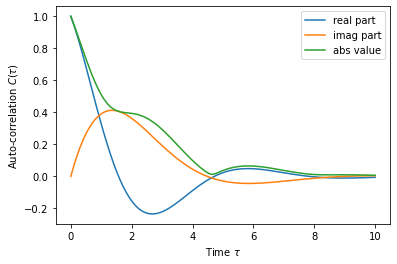

In [5]:
t_A2 = np.linspace(0, correlations_A.max_correlation_time, 100)
y_A2 = [correlations_A.correlation(tt) for tt in t_A2]
# -- plot --
plt.xlabel(r"Time $\tau$")
plt.ylabel(r"Auto-correlation $C(\tau)$")
plt.plot(t_A2,np.real(y_A2), label="real part")
plt.plot(t_A2,np.imag(y_A2), label="imag part")
plt.plot(t_A2,np.abs(y_A2), label="abs value")
plt.legend()

### A3: correlation_2d_integral() ***

In [6]:
square_A3 = correlations_A.correlation_2d_integral(time_1=0.25, delta=0.05, shape="square")
square_A3

(0.002137435203687432+0.0003837887043832471j)

In [7]:
upper_A3 = correlations_A.correlation_2d_integral(time_1=0.25, delta=0.05, shape="upper-triangle")
upper_A3

(0.0010552652986616634+0.00020296766929921522j)

In [8]:
lower_A3 = correlations_A.correlation_2d_integral(time_1=0.25, delta=0.05, shape="lower-triangle")
lower_A3

(0.001082169905025768+0.00018082103508403185j)

In [9]:
square_A3 - upper_A3 - lower_A3 # should be close to zero

(4.336808689942018e-19+0j)

## B: CustomSD class

In [10]:
correlations_C = tempo.PowerLawSD(alpha=0.2, zeta=0.25, cutoff=1.0, cutoff_type="exponential", temperature=2.0) 

In [11]:
print(correlations_C)

----------------------------------------------
PowerLawSD object: __unnamed__
 __no_description__
  cutoff        = 1.0 
  cutoff_type   = exponential 
  temperature   = 2.0 
  alpha         = 0.2 
  zeta          = 0.25 



In [12]:
correlations_C.correlation(300,epsrel=2.0e-2)

../oqupy/correlations.py:687: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  limit=subdiv_limit)[0]
../oqupy/correlations.py:698: IntegrationWarning: The maximum number of subdivisions (256) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  limit=subdiv_limit)[0]
../oqupy/correlations.py:703: IntegrationWarning: The maximum number of subdivisions (256) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain

(1.2882098504744224-0.00026330624153848023j)

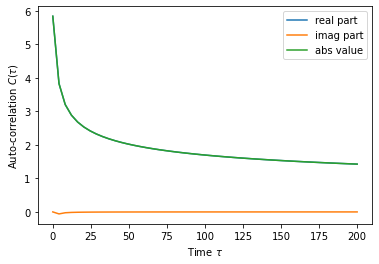

In [13]:
t_C2 = np.linspace(0, 200, 50)
y_C2 = [correlations_C.correlation(tt,epsrel=2.0e-2) for tt in t_C2]
# -- plot --
plt.xlabel(r"Time $\tau$")
plt.ylabel(r"Auto-correlation $C(\tau)$")
plt.plot(t_C2,np.real(y_C2), label="real part")
plt.plot(t_C2,np.imag(y_C2), label="imag part")
plt.plot(t_C2,np.abs(y_C2), label="abs value")
plt.legend()

In [14]:
correlations_C.correlation(300,epsrel=2.0e-3)

../oqupy/correlations.py:687: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  limit=subdiv_limit)[0]
../oqupy/correlations.py:698: IntegrationWarning: The maximum number of subdivisions (256) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  limit=subdiv_limit)[0]
../oqupy/correlations.py:703: IntegrationWarning: The maximum number of subdivisions (256) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain

(1.2882085943858892-0.0002636641857061457j)

### C3: correlation_2d_integral() ***

In [15]:
square_C3 = correlations_C.correlation_2d_integral(time_1=1.25, delta=0.05, shape="square")
square_C3

../oqupy/correlations.py:787: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  limit=subdiv_limit)[0]


(0.012557072716269562-0.00045309216033404285j)

In [16]:
upper_C3 = correlations_C.correlation_2d_integral(time_1=1.25, delta=0.05, shape="upper-triangle")
upper_C3

(0.006263431707262852-0.0002251359745941362j)

In [17]:
lower_C3 = correlations_C.correlation_2d_integral(time_1=1.25, delta=0.05, shape="lower-triangle")
lower_C3

../oqupy/correlations.py:787: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  limit=subdiv_limit)[0]


(0.00629376406052472-0.00022795617281928853j)

In [18]:
square_C3 - upper_C3 - lower_C3 # should be close to zero

(-1.2305151801065423e-07-1.2920618134432127e-11j)

In [19]:
%timeit correlations_C.correlation_2d_integral(time_1=1.25, delta=0.05, shape="upper-triangle",epsrel=1.0e-2)

326 ns ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
